In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import datetime
from sklearn import preprocessing
sns.set()

In [3]:
train = pd.read_csv('./train', nrows = 1000000)
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [4]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

In [6]:
train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.376314e+18,0.160219,1.410210e+07,1005.088166,0.229922,1.025540,0.223363,18262.203151,318.965808,56.495546,2041.031112,1.452262,190.779388,45505.857239,69.936118
std,5.236908e+18,0.366809,1.493256e+00,1.156928,0.464627,0.453899,0.667164,3510.366302,19.452897,36.546944,441.200965,1.362637,273.439286,49843.810147,38.513846
min,9.984920e+12,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.846660e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,15707.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,43.000000
50%,9.834387e+18,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,19251.000000,320.000000,50.000000,2161.000000,1.000000,39.000000,-1.000000,61.000000
75%,1.373053e+19,0.000000,1.410210e+07,1005.000000,0.000000,1.000000,0.000000,21153.000000,320.000000,50.000000,2420.000000,3.000000,297.000000,100084.000000,79.000000
max,1.844670e+19,1.000000,1.410210e+07,1012.000000,7.000000,5.000000,5.000000,21705.000000,1024.000000,1024.000000,2497.000000,3.000000,1835.000000,100248.000000,195.000000


In [7]:
train.isnull().any()
#各字段没有缺失值

id                  False
click               False
hour                False
C1                  False
banner_pos          False
site_id             False
site_domain         False
site_category       False
app_id              False
app_domain          False
app_category        False
device_id           False
device_ip           False
device_model        False
device_type         False
device_conn_type    False
C14                 False
C15                 False
C16                 False
C17                 False
C18                 False
C19                 False
C20                 False
C21                 False
dtype: bool

In [8]:
missing = train.isnull().sum()
missing = missing[missing != 0]
missing

Series([], dtype: int64)

/home/miaozzz/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


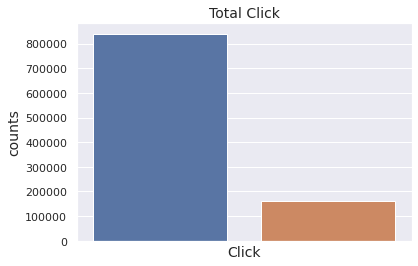

In [9]:
sns.countplot(train['click'])#统计click类别的特征数量plt.xlabel('User_ID',fontsize=14)   #X轴的名称
plt.xlabel('Click', fontsize=14)
plt.ylabel('counts',fontsize=14)    #Y轴名称
plt.title('Total Click',fontsize=14)        #图的名称
plt.xticks([])   #X轴刻度忽略
plt.show()

/home/miaozzz/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


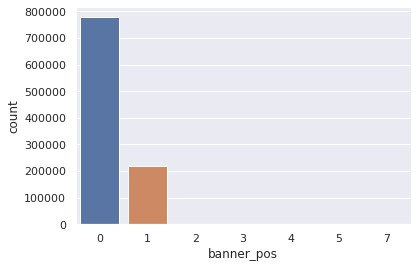

In [10]:
sns.countplot(train['banner_pos']) #广告位置
plt.show()

/home/miaozzz/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='site_category', ylabel='count'>

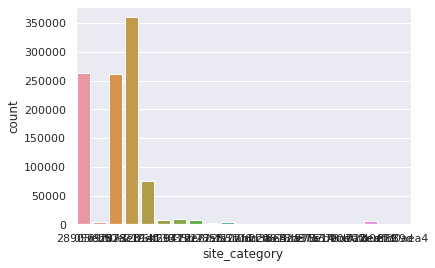

In [11]:
sns.countplot(train['site_category']) #广告类型

In [12]:
from collections import Counter
counts = Counter(train['site_category'])

In [13]:
Counter({'50e219e0': 360056, '28905ebd': 262519, 'f028772b': 260471, '3e814130': 75062, 'f66779e6': 8842, '76b2941d': 7880, '335d28a8': 7251, '70fb0e29': 4961, '0569f928': 4505, '75fa27f6': 3958, '72722551': 2705, 'c0dd3be3': 552, 'dedf689d': 508, 'a818d37a': 374, 'e787de0e': 281, 'bcf865d9': 25, '8fd0aea4': 22, '42a36e14': 13, '5378d028': 10, '9ccfa2ea': 4, '110ab22d': 1})


Counter({'50e219e0': 360056,
         '28905ebd': 262519,
         'f028772b': 260471,
         '3e814130': 75062,
         'f66779e6': 8842,
         '76b2941d': 7880,
         '335d28a8': 7251,
         '70fb0e29': 4961,
         '0569f928': 4505,
         '75fa27f6': 3958,
         '72722551': 2705,
         'c0dd3be3': 552,
         'dedf689d': 508,
         'a818d37a': 374,
         'e787de0e': 281,
         'bcf865d9': 25,
         '8fd0aea4': 22,
         '42a36e14': 13,
         '5378d028': 10,
         '9ccfa2ea': 4,
         '110ab22d': 1})

<AxesSubplot:xlabel='device_type', ylabel='count'>

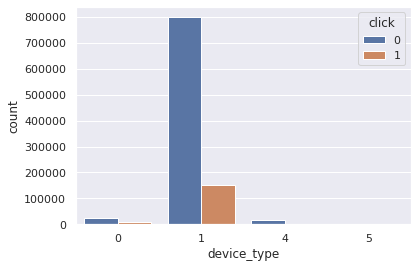

In [14]:
sns.countplot(x = "device_type", hue = "click", data = train)
#设备类型与点击结果的关联关系

<Figure size 432x288 with 0 Axes>

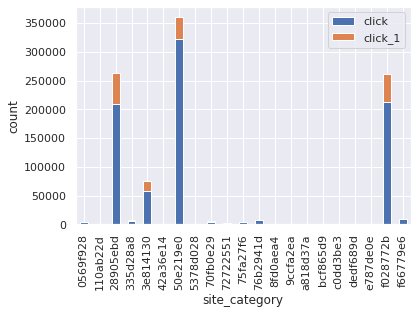

In [15]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

click_0 = train.site_category[train.click == 0].value_counts()
click_1 = train.site_category[train.click == 1].value_counts()

df=pd.DataFrame({'click':click_0, 'click_1':click_1})
df.plot(kind='bar', stacked=True)

plt.xlabel("site_category")
plt.ylabel("count")
plt.show()


In [16]:
train.site_id.value_counts()
#counts最高为332893 但还有大量 频率低于20的，这样的类别，需要后续处理。


85f751fd    332893
1fbe01fe    232096
d9750ee7     38603
e151e245     32359
5b08c53b     16455
             ...  
4c513588         1
09b74f3a         1
782e66e7         1
3767c235         1
95b665e0         1
Name: site_id, Length: 2075, dtype: int64

In [17]:
train.device_id.value_counts()

a99f214a    840265
c357dbff      1310
936e92fb       482
31da1bd0       292
787d2bb0       274
             ...  
d3b7fb72         1
f080d20b         1
c9808e10         1
4ed00e54         1
1b083693         1
Name: device_id, Length: 83431, dtype: int64

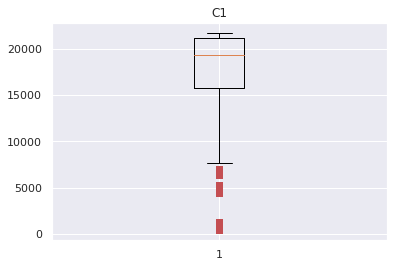

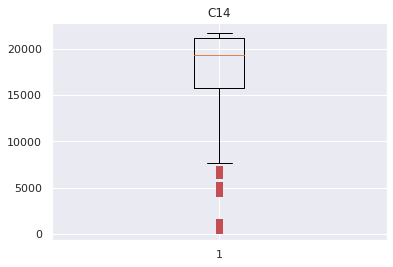

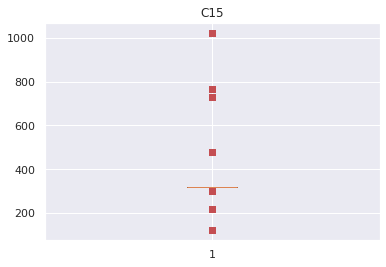

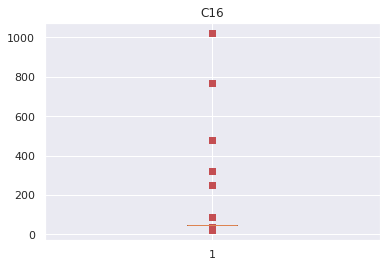

In [18]:
plt.boxplot(train['C14'], notch=False, sym='rs', vert=True)
plt.title('C1')
plt.show()
plt.boxplot(train['C14'], notch=False, sym='rs', vert=True)

plt.title('C14')
plt.show()
plt.boxplot(train['C15'], notch=False, sym='rs', vert=True)

plt.title('C15')
plt.show()
plt.boxplot(train['C16'], notch=False, sym='rs', vert=True)
plt.title('C16')
plt.show()


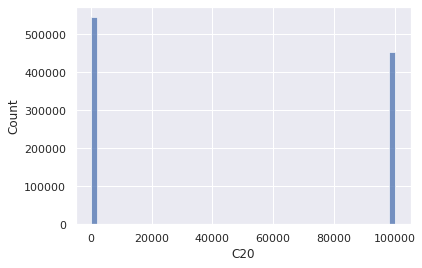

In [19]:
sns.histplot(train.C20)
plt.show()

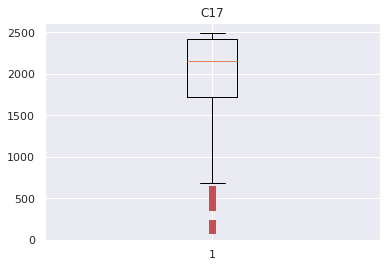

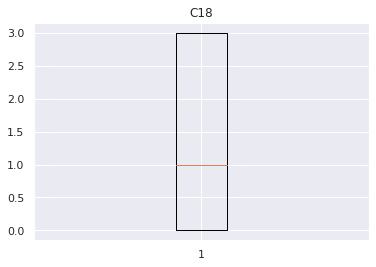

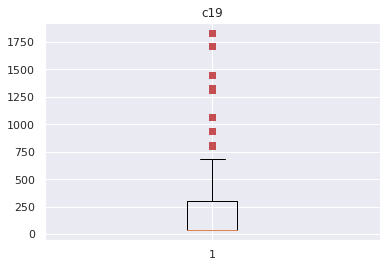

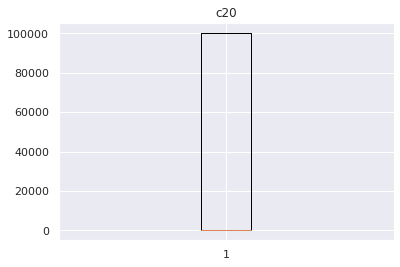

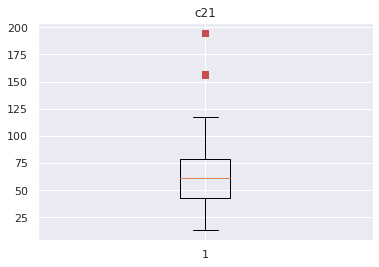

In [20]:
plt.boxplot(train['C17'], notch=False, sym='rs', vert=True)
plt.title('C17')
plt.show()
plt.boxplot(train['C18'], notch=False, sym='rs', vert=True)
plt.title('C18')
plt.show()
plt.boxplot(train['C19'], notch=False, sym='rs', vert=True)
plt.title('c19')
plt.show()
plt.boxplot(train['C20'], notch=False, sym='rs', vert=True)
plt.title('c20')
plt.show()
plt.boxplot(train['C21'], notch=False, sym='rs', vert=True)
plt.title('c21')
plt.show()

/home/miaozzz/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


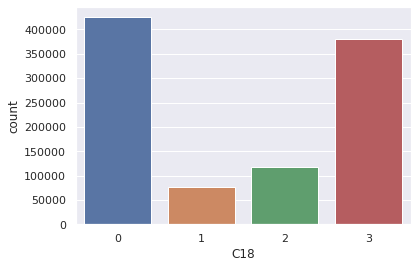

In [21]:
sns.countplot(train['C18']) #广告位置
plt.show()


/home/miaozzz/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


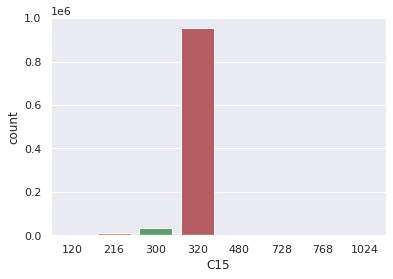

In [22]:
sns.countplot(train['C15']) #广告位置
plt.show()

/home/miaozzz/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


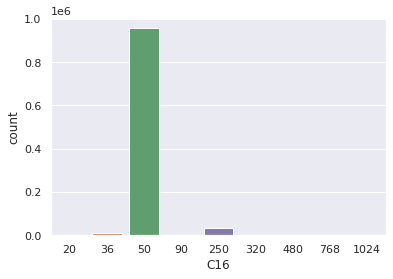

In [23]:
sns.countplot(train['C16']) #广告位置
plt.show()

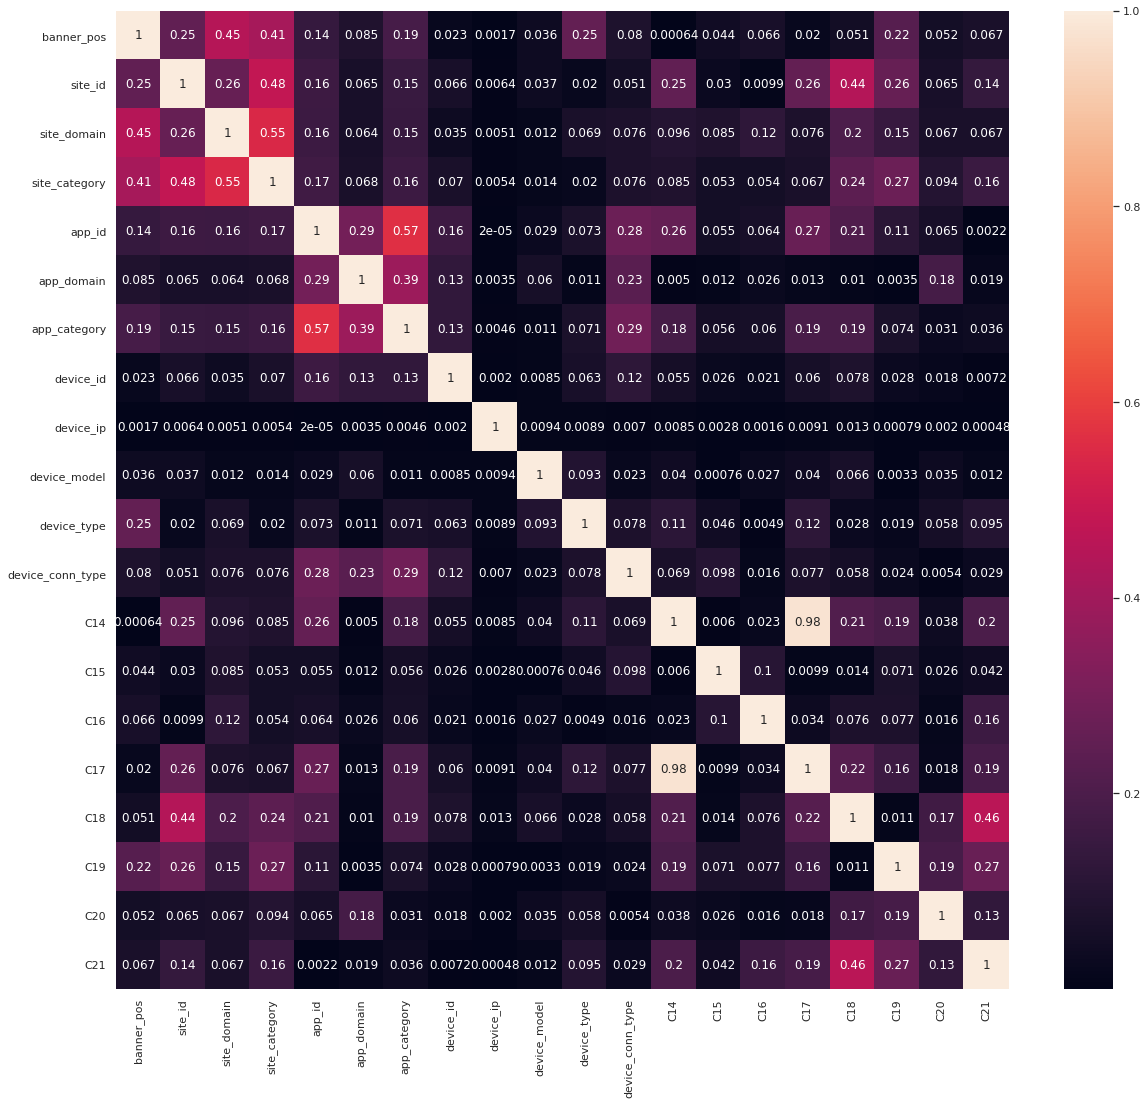

In [24]:
for column in ['C1', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model']:
    enc = preprocessing.LabelEncoder()
    train[column] = enc.fit_transform(train[column])
    
sub_train = train.iloc[:, 4:]
plt.figure(figsize=(20, 18))
sns.heatmap(sub_train.corr().abs(), annot=True)
plt.show()
#C14 与 C17线性相关性非常强。

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
train_all = pd.read_csv('./train')
split = StratifiedShuffleSplit(n_splits=1, train_size=0.05, random_state=42)
for train_index, test_index in split.split(train_all, train_all["click"]):
    strat_train_set = train_all.loc[train_index]
    strat_train_set.to_csv("./train_sample.csv", header = True)


In [26]:
train = pd.read_csv('./train_sample.csv')
train.click.value_counts()


0    1678195
1     343253
Name: click, dtype: int64

In [27]:
train_all.click.value_counts()

0    33563901
1     6865066
Name: click, dtype: int64

In [28]:
corr_matrix = train.corr()
corr_matrix["click"].sort_values(ascending = False)

click               1.000000
C16                 0.129248
banner_pos          0.025601
C18                 0.022217
id                  0.000267
C19                -0.004145
hour               -0.007844
Unnamed: 0         -0.007847
C15                -0.031309
C1                 -0.036655
device_type        -0.037190
C17                -0.054340
C20                -0.058545
C14                -0.059145
C21                -0.069815
device_conn_type   -0.083050
Name: click, dtype: float64

In [30]:
tr_csv_path = './train_sample.csv'
ts_csv_path = './test'

data_type = {'id': 'U', 'hour': 'U', 'device_type':'U', 'C1':'U', 'C15':'U', 'C16':'U'}

train = pd.read_csv(tr_csv_path, dtype=data_type, index_col='id')
test  = pd.read_csv(ts_csv_path, dtype=data_type, index_col='id')
test.insert(0, 'click', 0)

tr_ts = pd.concat([test, train], copy=False)
tr_ts.head()


,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,Unnamed: 0
id,,,,,,,,,,,,,,,,,,,,,
1.000017e+19,0,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,0,8330,320,50,761,3,175,100075,23,NaN
1.000018e+19,0,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,22676,320,50,2616,0,35,100083,51,NaN
1.000055e+19,0,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,22676,320,50,2616,0,35,100083,51,NaN
1.000109e+19,0,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,0,18648,320,50,1092,3,809,100156,61,NaN
1.000138e+19,0,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,0,23160,320,50,2667,0,47,-1,221,NaN


In [31]:
site_id_count = tr_ts.site_id.value_counts()
site_id_category={}
site_id_category[0] = site_id_count.loc[site_id_count>20].index.values
site_id_category[1] = site_id_count.loc[site_id_count<=20].index.values

site_id_C_type_dict = {}
for key, values in site_id_category.items():
    for item in values:
        site_id_C_type_dict[str(item)] = key

json.dump(site_id_C_type_dict, open("site_id_C_type_dict.json", "w"))


In [32]:
site_domain_count = tr_ts.site_domain.value_counts()
site_domain_category={}
site_domain_category[0] = site_domain_count.loc[site_domain_count>20].index.values
site_domain_category[1] = site_domain_count.loc[site_domain_count<=20].index.values

site_domain_C_type_dict = {}
for key, values in site_domain_category.items():
    for item in values:
        site_domain_C_type_dict[str(item)] = key

json.dump(site_domain_C_type_dict, open("site_domain_C_type_dict.json", "w"))


In [33]:
app_id_count = tr_ts.app_id.value_counts()
app_id_category={}
app_id_category[0] = app_id_count.loc[app_id_count>20].index.values
app_id_category[1] = app_id_count.loc[app_id_count<=20].index.values

app_id_C_type_dict = {}
for key, values in app_id_category.items():
    for item in values:
        app_id_C_type_dict[str(item)] = key

json.dump(app_id_C_type_dict, open("app_id_C_type_dict.json", "w"))


In [34]:
device_model_count = tr_ts.device_model.value_counts()
device_model_category={}
device_model_category[0] = device_model_count.loc[device_model_count>200].index.values
device_model_category[1] = device_model_count.loc[device_model_count<=200].index.values

device_model_C_type_dict = {}
for key, values in device_model_category.items():
    for item in values:
        device_model_C_type_dict[str(item)] = key

json.dump(device_model_C_type_dict, open("device_model_C_type_dict.json", "w"))


In [35]:
train['day']= np.round(train.hour.astype(float) % 10000 / 100)#some error
train['hour1'] = np.round(train.hour.astype(int) % 100)
train['day'].value_counts()
print("-" * 40)
train['hour1'].value_counts()

----------------------------------------


13    119760
9     113492
12    110690
14    109941
10    107799
8     104858
15    104058
16    102962
11    102105
17    101638
5      99650
4      95710
7      92646
18     88205
6      87754
3      69626
19     65279
2      61303
20     56108
21     49966
1      49414
22     45532
0      42098
23     40854
Name: hour1, dtype: int64

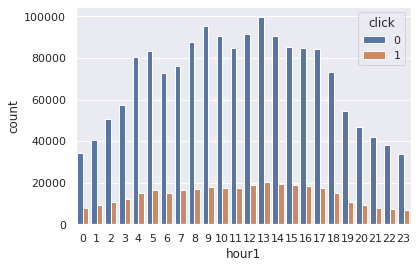

In [36]:
sns.countplot(x="hour1", hue="click",data=train)
plt.show()

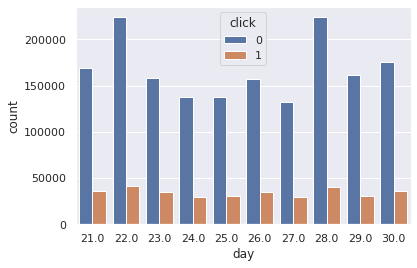

In [37]:
sns.countplot(x="day", hue="click",data=train)
plt.show()

In [38]:
tr_ts['day'] = tr_ts['hour'].apply(lambda x: x[-4:-2])
tr_ts['hour'] = tr_ts['hour'].apply(lambda x: x[-2:])

tr_ts['is_device'] = tr_ts['device_id'].apply(lambda x: 0 if x=='a99f214a' else 1)  #详见探索性数据分析部分


app_id_C_type_dict = json.load(open("app_id_C_type_dict.json", "r"))
site_id_C_type_dict = json.load(open("site_id_C_type_dict.json", "r"))
site_domain_C_type_dict = json.load(open("site_domain_C_type_dict.json", "r"))
device_model_C_type_dict = json.load(open("device_model_C_type_dict.json", "r"))

tr_ts['C_app_id'] = tr_ts["app_id"].apply(lambda x: x if app_id_C_type_dict.get(x)==0 else "other_app_id")
tr_ts['C_site_id'] = tr_ts['site_id'].apply(lambda x: x if site_id_C_type_dict.get(x)==0 else "other_site_id")
tr_ts['C_site_domain'] = tr_ts['site_domain'].apply(lambda x: x if site_domain_C_type_dict.get(x)==0 else "other_site_domain")
tr_ts['C_device_model'] = tr_ts['device_model'].apply(lambda x: x if device_model_C_type_dict.get(x)==0 else "other_device_model")

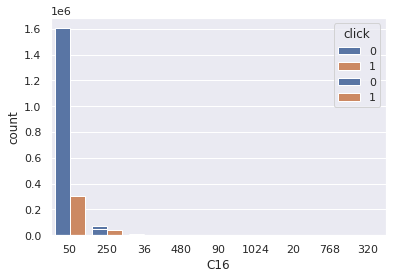

----------------------------------------


50      1906686
250       90330
36        15097
480        5191
90         3673
20          147
768         131
320         102
1024         91
Name: C16, dtype: int64

In [39]:
sns.countplot(x="C15", hue="click",data=train)
sns.countplot(x="C16", hue="click",data=train)
plt.show()
train['C15'].value_counts()
print("-" * 40)
train['C16'].value_counts()


In [40]:
tr_ts["C_pix"] = tr_ts["C15"] + '&' + tr_ts["C16"]
tr_ts["C_device_type_1"] = tr_ts["device_type"] + '&' + tr_ts["C1"]

tr_ts.drop(['device_id', "device_type", 'app_id', 'site_id', 'site_domain', 'device_model',"C1", "C17", 'C15', 'C16'], axis=1, inplace=True)


In [41]:
lenc = preprocessing.LabelEncoder()
C_fields = [ 'hour', 'banner_pos', 'site_category', 'app_domain', 'app_category',
            'device_conn_type', 'C14', 'C18', 'C19', 'C20','C21', 'is_device', 'C_app_id', 'C_site_id', 
            'C_site_domain', 'C_device_model', 'C_pix', 'C_device_type_1']
for f, column in enumerate(C_fields):
    print("convert " + column + "...")
    tr_ts[column] = lenc.fit_transform(tr_ts[column])


dummies_site_category = pd.get_dummies(tr_ts['site_category'], prefix = 'site_category')
dummies_app_category = pd.get_dummies(tr_ts['app_category'], prefix = 'app_category')



tr_ts_new = pd.concat([tr_ts, dummies_site_category, dummies_app_category], axis=1)
tr_ts_new.drop(['site_category', 'app_category'], axis = 1, inplace=True)
tr_ts_new.iloc[:test.shape[0],].to_csv('./test_FE.csv')
tr_ts_new.iloc[test.shape[0]:,].to_csv('./train_FE.csv')

convert hour...
convert banner_pos...
convert site_category...
convert app_domain...
convert app_category...
convert device_conn_type...
convert C14...
convert C18...
convert C19...
convert C20...
convert C21...
convert is_device...
convert C_app_id...
convert C_site_id...
convert C_site_domain...
convert C_device_model...
convert C_pix...
convert C_device_type_1...


In [2]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import datetime
from sklearn import preprocessing
sns.set()
from collections import defaultdict
site_id_users = defaultdict(set)
app_id_users = defaultdict(set)
tr_path = './train_FE.csv'
with open(tr_path, 'r') as csv_file:
    for i, row in enumerate(csv.DictReader(csv_file), start=1):
        site_id_users[row['C_site_id']].add(row['device_ip'])
        app_id_users[row['C_app_id']].add(row['device_ip'])
ts_path = './train_FE.csv'
with open(ts_path, 'r') as csv_file:
    for i, row in enumerate(csv.DictReader(csv_file), start=1):
        site_id_users[row['C_site_id']].add(row['device_ip'])  #广告对应设备id
        app_id_users[row['C_app_id']].add(row['device_ip'])    #app对应设备id

app_id_dict = pd.Series()
site_id_dict = pd.Series()

for item in app_id_users:
    app_id_dict[item] = int(np.log10(len(app_id_users[item])))


for item in site_id_users:
    site_id_dict[item] = int(np.log10(len(site_id_users[item])))

app_id_dict = app_id_dict.sort_values(ascending=False)
site_id_dict = site_id_dict.sort_values(ascending=False)

app_id_users = app_id_dict.to_dict()
site_id_users = site_id_dict.to_dict()


ts_csv_path = './test_FE.csv'
tr_csv_path = './train_FE.csv'

test  = pd.read_csv(ts_csv_path, dtype={'id': 'U'}, index_col='id')
train = pd.read_csv(tr_csv_path, dtype={'id': 'U'}, index_col='id')
tr_ts = pd.concat([test, train], copy=False)

tr_ts['app_id_users'] = tr_ts.C_app_id.apply(lambda x: app_id_users[str(x)] if str(x) in app_id_users else 0)
tr_ts['site_id_users'] = tr_ts.C_site_id.apply(lambda x: site_id_users[str(x)] if str(x) in site_id_users else 0)

<ipython-input-2-834e6744c449>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app_id_dict = pd.Series()
<ipython-input-2-834e6744c449>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  site_id_dict = pd.Series()


In [3]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(tr_ts[['C14','C18','C19','C20','C21']])
tr_ts[['C14','C18','C19','C20','C21']] = age_scale_param.transform(tr_ts[['C14','C18','C19','C20','C21']])


In [4]:
tr_ts.iloc[:test.shape[0],].to_csv('ts_FE.csv')
tr_ts.iloc[test.shape[0]:,].to_csv('tr_FE.csv')

In [6]:
train = pd.read_csv('tr_FE.csv')
print(train.shape)
test = pd.read_csv('ts_FE.csv')
print(test.shape)

(2021448, 78)
(4577464, 78)


In [7]:
test.head()

,id,click,hour,banner_pos,app_domain,device_ip,device_conn_type,C14,C18,C19,...,app_category_23,app_category_24,app_category_25,app_category_26,app_category_27,app_category_28,app_category_29,app_category_30,app_id_users,site_id_users
0,1.000017e+19,0,0,0,154,69f45779,0,-1.539529,1.260900,0.158589,...,0,0,0,0,0,0,0,0,5,3
1,1.000018e+19,0,0,0,154,e8d44657,0,0.214307,-1.023986,-0.684065,...,0,0,0,0,0,0,0,0,5,5
2,1.000055e+19,0,0,0,154,10fb085b,0,0.214307,-1.023986,-0.684065,...,0,0,0,0,0,0,0,0,5,5
3,1.000109e+19,0,0,0,220,422d257a,0,-1.027605,1.260900,2.195003,...,0,0,0,0,0,0,0,0,3,5
4,1.000138e+19,0,0,0,46,078c6b38,0,0.659763,-1.023986,-0.262738,...,0,0,0,0,0,0,1,0,4,5


Solving environment: done

## Package Plan ##

  environment location: /home/miaozzz/anaconda3/envs/tf-gpu

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  defaults
    certifi-2021.5.30          |   py38h06a4308_0         138 KB  defaults
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB  defaults
    libxgboost-1.3.3           |       h2531618_0         1.8 MB  defaults
    py-xgboost-1.3.3           |   py38h06a4308_0         138 KB  defaults
    scikit-learn-0.24.2        |   py38ha9443f7_0         5.4 MB  defaults
    xgboost-1.3.3              |   py38h06a4308_0          23 KB  defaults
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following NEW packages will be INSTALLED:

  _p

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score #评估指标
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

if __name__ == '__main__':



    train = pd.read_csv('tr_FE.csv')

    y_train = train.click
    X_train = train.drop(['click', 'device_ip', 'Unnamed: 0'], axis = 1)

    #X_test = loadTestData(testFilePath)

    cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
    other_params = {'learning_rate': 0.1, 
    'n_estimators': 500, 
    'max_depth': 5, 
    'min_child_weight': 1, 
    'seed': 0,
    'subsample': 0.8, 
    'objective' : 'binary:logistic',
    'colsample_bytree': 0.8, 
    'gamma': 0,  
    }
    

    model = xgb.XGBClassifier(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_log_loss', cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)

    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
model = xgb.XGBRegressor(n_estimators=350, max_depth=10, objective='binary:logistic', min_child_weight=50,
                         subsample=0.8, gamma=0, learning_rate=0.2, colsample_bytree=0.5, seed=27)

model.fit(X_train, y_train)
plot_importance(model, importance_type="gain")

features = X_train.columns
feature_importance_values = model.feature_importances_

feature_importances = pd.DataFrame({'feature': list(features), 'importance': feature_importance_values})

feature_importances.sort_values('importance', inplace=True, ascending=False)
print(feature_importances)

print(model.get_booster().get_score(importance_type="gain"))


feature_importances.to_csv('feature.csv')